# Crawl News and Sentiment Analysis
The crawling process was done using news-watch. Written by Okky Maburi.

The Lexicon for Sentiment analysis was taken from https://github.com/onpilot/sentimen-bahasa. Written by onpilot.

The transformer model for Sentiment analysis was taken from https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification/discussions. Written by mdhugol.




In [ ]:
# Mounting Google Drive into Google Collab Environment
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing News-Watch Package
#!pip install news-watch

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlo

In [ ]:
# Importing packages needed for basic analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
# News Data Scrapper: News-Watch
#!newswatch -k "ihsg" -sd 2025-02-01 #EDIT: Keywords and Date of scrapping program

/usr/local/lib/python3.11/dist-packages/newswatch/scrapers/viva.py:68: UserWarning: Ignoring nested list {'class': ['recommended-article', 'widget-other-article']} to avoid the possibility of infinite recursion.
  for elem in content_div.find_all(
2025-02-12 06:50:04,787 [ERROR] root: Error parsing article http://money.kompas.com/read/2025/02/07/060725026/runtuhnya-ihsg-setelah-danantara-diresmikan-dpr: 'NoneType' object has no attribute 'get_text'
2025-02-12 06:50:04,956 [WARNING] root: Retry 1/3 for https://katadata.co.id/search/news/ihsg/-/-/-/-/-/-/10
2025-02-12 06:50:07,251 [ERROR] root: Timeout fetching https://finance.detik.com/bursa-dan-valas/d-7774306/ihsg-hari-ini-dibuka-menguat-tapi-masih-di-6-500?single=1
2025-02-12 06:50:07,253 [WARNING] root: No response for https://finance.detik.com/bursa-dan-valas/d-7774306/ihsg-hari-ini-dibuka-menguat-tapi-masih-di-6-500
2025-02-12 06:50:07,254 [ERROR] root: Timeout fetching https://finance.detik.com/bursa-dan-valas/d-7773742/saham-per

In [ ]:
# Load dataset
!wget -O news-watch-ketegangan perdagangan-sd-2024-01.csv "https://github.com/prospera-da/news-analysis/blob/main/data/news-watch-ketegangan%20perdagangan-sd-2024-01.csv" #EDIT: NAME OF CSV FILE

file_path = (
    f"news-watch-ketegangan perdagangan-sd-2024-01.csv"  # EDIT: NAME OF CSV FILE
)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Data preprocessing
df = df.drop_duplicates(subset=["keyword", "source", "link"])

# Display the DataFrame
display(df)

,title,publish_date,author,content,keyword,category,source,link
0,"Sempat Terbang, Emas Hancur Bersama Mundurnya ...",2024-07-23 06:50:00,"Chandra Dwi,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas ditutup ...",ketegangan perdagangan,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024072...
1,"Breaking! Harga Emas Tembus Rekor Baru, Mepet ...",2025-02-10 14:06:00,"mae,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas tembus r...",tarif trump,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2025021...
2,"Perdagangan Internasional: Pengertian, Manfaat...",2024-05-03 07:00:00,Nur Wasilatus Sholeha -detikEdu,Daftar Isi\nPengertian Perdagangan Internasion...,perang tarif,detikEdu,detik.com,https://www.detik.com/edu/detikedu/d-7321635/p...
3,"Serangan Israel Tidak Mempan ke Iran, Harga Mi...",2024-10-28 10:35:00,"Robertus Andrianto,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHarga minyak mentah...",ketegangan perdagangan,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202410280...
4,"7 Fakta Pemilu AS 2024, Siapa yang Dunia Mau J...",2024-11-05 15:05:00,"Tommy Patrio Sorongan,CNBC Indonesia","Jakarta, CNBC Indonesia\n-\nAmerika Serikat (A...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241105144...
...,...,...,...,...,...,...,...,...
4436,"Isi Lengkap Perang Dagang 2.0 Trump, Tarif Ber...",2025-02-03 08:55:00,"Thea Fathanah Arbar,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Presiden Amerika Se...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20250203075...
4437,"Bangga! Lewat Nikel, RI Bakal Punya Peran Stra...",2024-10-29 12:40:00,"Firda Dwi Muliawati,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHolding BUMN Pertam...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241029121...
4438,"Cegah Serbuan Produk China ke AS, Biden Mau Na...",2024-04-18 08:45:00,Aulia Damayanti -detikFinance,Jakarta\n-\nPresiden Amerika Serikat (AS) Joe ...,tarif China,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...
4439,Putar Otak Siasati Ancaman Perang Dagang AS-Ch...,2025-01-15 12:55:00,Amanda Christabel -detikFinance,Jakarta\n-\nPemerintah mengatakan kekhawatiran...,tarif AS,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...


# Method 1: Using External Dictionary for Sentiment Analysis Classification

In [ ]:
# Install NLTK package
!pip install nltk

In [ ]:
# Importing several tools from NLTK needed for Lexicon Based Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import requests

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Utilizing NLTK VADER using custom Lexicon

# Download the file into your Colab session
!wget -O _json_sentiwords_id.txt "https://raw.githubusercontent.com/onpilot/sentimen-bahasa/refs/heads/master/leksikon/sentistrength_id/_json_sentiwords_id.txt"

# Create Sentiment Analysis Analyzer
sia2 = SentimentIntensityAnalyzer()

# Cleaning Default Lexicon Provided from VADER
sia2.lexicon.clear()

# Opening Lexicon from sentiwords_id file
with open("/content/_json_sentiwords_id.txt") as f:
    data2 = f.read()

# Updating Lexicon for VADER Analysis from sentiwords_id
senti = json.loads(data2)
sia2.lexicon.update(senti)

# Show Example of Lexicon from sentiwords_id
print(reprlib.repr(sia2.lexicon))

--2025-02-17 03:13:16--  https://raw.githubusercontent.com/onpilot/sentimen-bahasa/refs/heads/master/leksikon/sentistrength_id/_json_sentiwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26666 (26K) [text/plain]
Saving to: ‘_json_sentiwords_id.txt’

_json_sentiwords_id 100%[===================>]  26.04K  --.-KB/s    in 0.002s  

2025-02-17 03:13:16 (13.8 MB/s) - ‘_json_sentiwords_id.txt’ saved [26666/26666]

{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


In [ ]:
# Creating a Function for Sentiment Analysis
def categorize_sentiment_senti(news: str) -> str:
    """
    Categorize the sentiment of a news title as 'Positive', 'Negative', or 'Neutral'
    based on the compound score of a sentiment analyzer (sia2).
    """
    compound_score = sia2.polarity_scores(news)["compound"]

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


# Adding a new column for SENTI-based classification labels
df["sentiment_dict"] = df["title"].apply(lambda news: categorize_sentiment_senti(news))

<ipython-input-24-8dba32222dfb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_dict', data=df, palette=palette_dict)


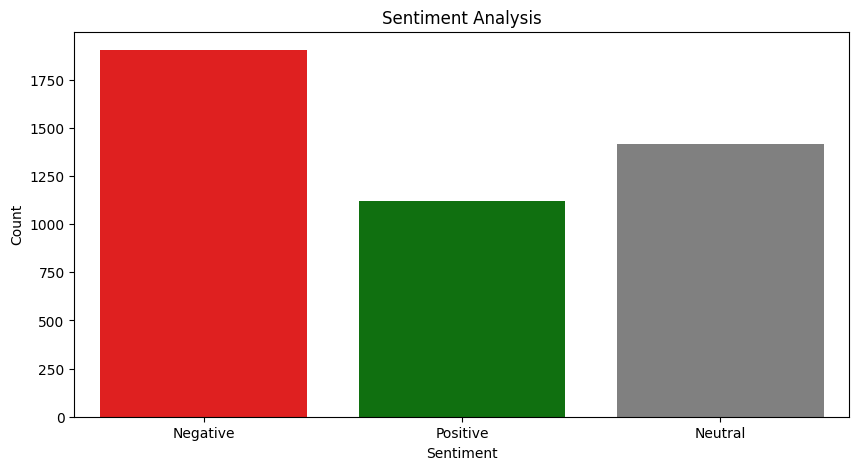

In [ ]:
# Create a good report for the sentiment analysis
# set the figure color
palette_dict = {"Negative": "red", "Positive": "green", "Neutral": "gray"}

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x="sentiment_dict", data=df, palette=palette_dict)

# set the title
plt.title("Sentiment Analysis")

# set the x and y label
plt.xlabel("Sentiment")
plt.ylabel("Count")

# show the plot
plt.show()

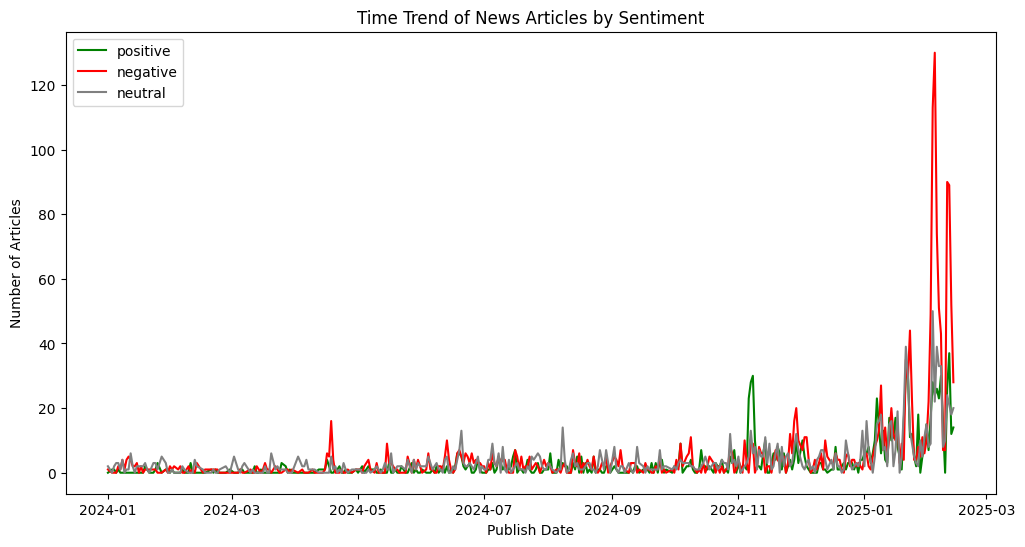

In [ ]:
# Assume your DataFrame is named df and has columns 'publish_date' and 'sentiment'
# Convert the publish_date column to datetime (if not already)
df["publish_date"] = pd.to_datetime(df["publish_date"])

# Group the data by publish date and sentiment, and count the number of articles
# Here, we use daily frequency ('D'); you could also use weekly ('W') or monthly ('M') if you prefer
df_grouped_dict = (
    df.groupby([pd.Grouper(key="publish_date", freq="D"), "sentiment_dict"])
    .size()
    .reset_index(name="count")
)

# Pivot the DataFrame so that sentiments become columns
df_pivot = df_grouped_dict.pivot(
    index="publish_date", columns="sentiment_dict", values="count"
).fillna(0)

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot.get("Positive", []), label="positive", color="green")
plt.plot(df_pivot.index, df_pivot.get("Negative", []), label="negative", color="red")
plt.plot(df_pivot.index, df_pivot.get("Neutral", []), label="neutral", color="grey")

plt.xlabel("Publish Date")
plt.ylabel("Number of Articles")
plt.title("Time Trend of News Articles by Sentiment")
plt.legend()
plt.show()

# Method 2: Using Machine Learning for Sentiment Analysis Classification

In [ ]:
# Downloading Transformers Model from mdhugol
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Showcasing Results of ML Based Sentiment Analysis
label_index = {"LABEL_0": "positive", "LABEL_1": "neutral", "LABEL_2": "negative"}

sentence = "Ekonom Ingatkan Risiko Penghematan Anggaran Rp750 Triliun ala Prabowo"

result = sentiment_analysis(sentence)
status = label_index[result[0]["label"]]
score = result[0]["score"]
print(f"Sentence: {sentence} | Label : {status} ({score * 100:.3f}%)")

Sentence: Ekonom Ingatkan Risiko Penghematan Anggaran Rp750 Triliun ala Prabowo | Label : neutral (99.665%)


In [ ]:
# Function to convert data types
def convert_dtype(x):
    if not x:
        return ""
    try:
        return str(x)
    except:
        return ""


# Perform sentiment analysis (replace `sentiment_analysis` with your actual sentiment analysis function)
result = sentiment_analysis(df["title"].tolist())

# Show the total number of news article
print(f"Total News Articles: {len(result)}")

Total News Articles: 4441


In [ ]:
# create a new column in the dataframe to store the sentiment result
df["sentiment_ml"] = [label_index[i["label"]] for i in result]
df["score_ml"] = [i["score"] for i in result]

<ipython-input-41-85ad97ae9aed>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_ml', data=df , palette=palette_ml)


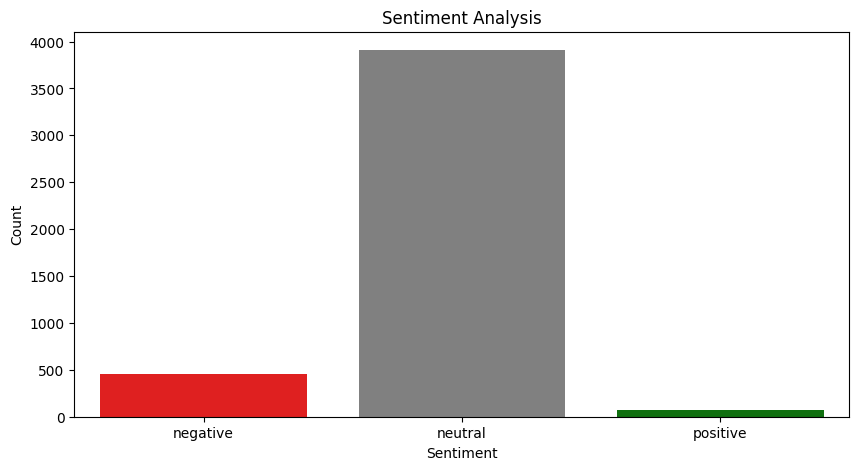

In [ ]:
# Create a good report for the sentiment analysis

import matplotlib.pyplot as plt
import seaborn as sns

# set the figure color
palette_ml = {"negative": "red", "positive": "green", "neutral": "gray"}

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x="sentiment_ml", data=df, palette=palette_ml)

# set the title
plt.title("Sentiment Analysis")

# set the x and y label
plt.xlabel("Sentiment")
plt.ylabel("Count")

# show the plot
plt.show()

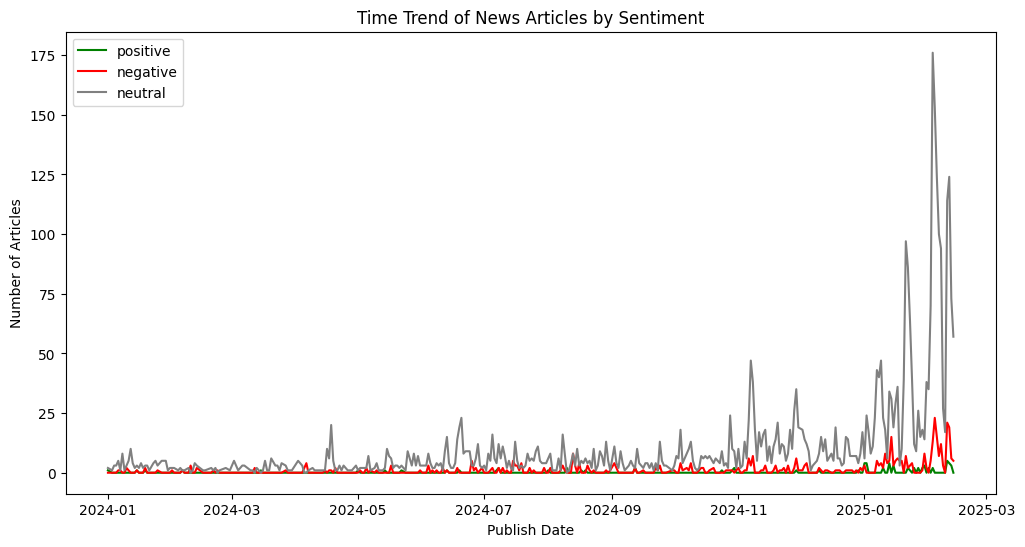

In [ ]:
# Group the data by publish date and sentiment, and count the number of articles
# Here, we use daily frequency ('D'); you could also use weekly ('W') or monthly ('M') if you prefer
df_grouped_ai = (
    df.groupby([pd.Grouper(key="publish_date", freq="D"), "sentiment_ml"])
    .size()
    .reset_index(name="count")
)

# Pivot the DataFrame so that sentiments become columns
df_pivot = df_grouped_ai.pivot(
    index="publish_date", columns="sentiment_ml", values="count"
).fillna(0)

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot.get("positive", []), label="positive", color="green")
plt.plot(df_pivot.index, df_pivot.get("negative", []), label="negative", color="red")
plt.plot(df_pivot.index, df_pivot.get("neutral", []), label="neutral", color="grey")

plt.xlabel("Publish Date")
plt.ylabel("Number of Articles")
plt.title("Time Trend of News Articles by Sentiment")
plt.legend()
plt.show()

In [ ]:
# Saving Sentiment Analysis Data
df.to_csv(
    "/content/news-watch-ketegangan perdagangan-sd-2024-01_sentiment.csv",
    index=True,
    sep=";",
)  # EDIT: CSV Name

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(
    "/content/news-watch-ketegangan perdagangan-sd-2024-01_sentiment.csv", delimiter=";"
)  # EDIT: CSV Name sama as previous code

# Display the DataFrame
display(df)

,Unnamed: 0,title,publish_date,author,content,keyword,category,source,link,sentiment_dict,sentiment_ml,score_ml
0,0,"Sempat Terbang, Emas Hancur Bersama Mundurnya ...",2024-07-23 06:50:00,"Chandra Dwi,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas ditutup ...",ketegangan perdagangan,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024072...,Negative,negative,0.670230
1,1,"Breaking! Harga Emas Tembus Rekor Baru, Mepet ...",2025-02-10 14:06:00,"mae,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Harga emas tembus r...",tarif trump,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2025021...,Positive,neutral,0.993590
2,2,"Perdagangan Internasional: Pengertian, Manfaat...",2024-05-03 07:00:00,Nur Wasilatus Sholeha -detikEdu,Daftar Isi\nPengertian Perdagangan Internasion...,perang tarif,detikEdu,detik.com,https://www.detik.com/edu/detikedu/d-7321635/p...,Positive,neutral,0.993547
3,3,"Serangan Israel Tidak Mempan ke Iran, Harga Mi...",2024-10-28 10:35:00,"Robertus Andrianto,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHarga minyak mentah...",ketegangan perdagangan,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202410280...,Negative,neutral,0.775996
4,4,"7 Fakta Pemilu AS 2024, Siapa yang Dunia Mau J...",2024-11-05 15:05:00,"Tommy Patrio Sorongan,CNBC Indonesia","Jakarta, CNBC Indonesia\n-\nAmerika Serikat (A...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241105144...,Neutral,neutral,0.984849
...,...,...,...,...,...,...,...,...,...,...,...,...
4436,4436,"Isi Lengkap Perang Dagang 2.0 Trump, Tarif Ber...",2025-02-03 08:55:00,"Thea Fathanah Arbar,CNBC Indonesia","Jakarta, CNBC Indonesia\n- Presiden Amerika Se...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20250203075...,Negative,neutral,0.997549
4437,4437,"Bangga! Lewat Nikel, RI Bakal Punya Peran Stra...",2024-10-29 12:40:00,"Firda Dwi Muliawati,CNBC Indonesia","Jakarta, CNBC Indonesia -\nHolding BUMN Pertam...",perang tarif,Berita,cnbcindonesia.com,https://www.cnbcindonesia.com/news/20241029121...,Positive,positive,0.916436
4438,4438,"Cegah Serbuan Produk China ke AS, Biden Mau Na...",2024-04-18 08:45:00,Aulia Damayanti -detikFinance,Jakarta\n-\nPresiden Amerika Serikat (AS) Joe ...,tarif China,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...,Negative,neutral,0.996917
4439,4439,Putar Otak Siasati Ancaman Perang Dagang AS-Ch...,2025-01-15 12:55:00,Amanda Christabel -detikFinance,Jakarta\n-\nPemerintah mengatakan kekhawatiran...,tarif AS,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...,Negative,neutral,0.827902
